# Square-root transformation

- The __square root__ transform √x and its variations the __Anscombe__ transform √(x+3/8) and __Freeman-Tukey__ transformation, √x + √(x+1), are variance stabilizing transformations that transform a variable with a __Poisson distribution__ into one with an __approximately standard Gaussian distribution__. 
- The square root transform is a form of power transform where the exponent is 1/2 and is only defined for positive values.
- The __Poisson distribution__ indicates the number of times an event is likely to occur. (ie, a count distribution.)
    - It is right-skewed; its variance equals its mean. 
    - Examples: the number of financial items (# of current accounts or credit cards, #  of passengers in a vehicle, and the number of occupants in a household.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# create dataframe & draw samples from a poisson distribution.
df = pd.DataFrame()
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)
df.head()

,counts1,counts2
0,1,2
1,1,2
2,5,2
3,5,3
4,4,4


In [3]:
# draw side-by-side histogram & Q-Q plot for a varaible
def diagnostic_plots(df, variable):

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index().plot.bar()
    plt.title(f"Bar plot of {variable}")

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

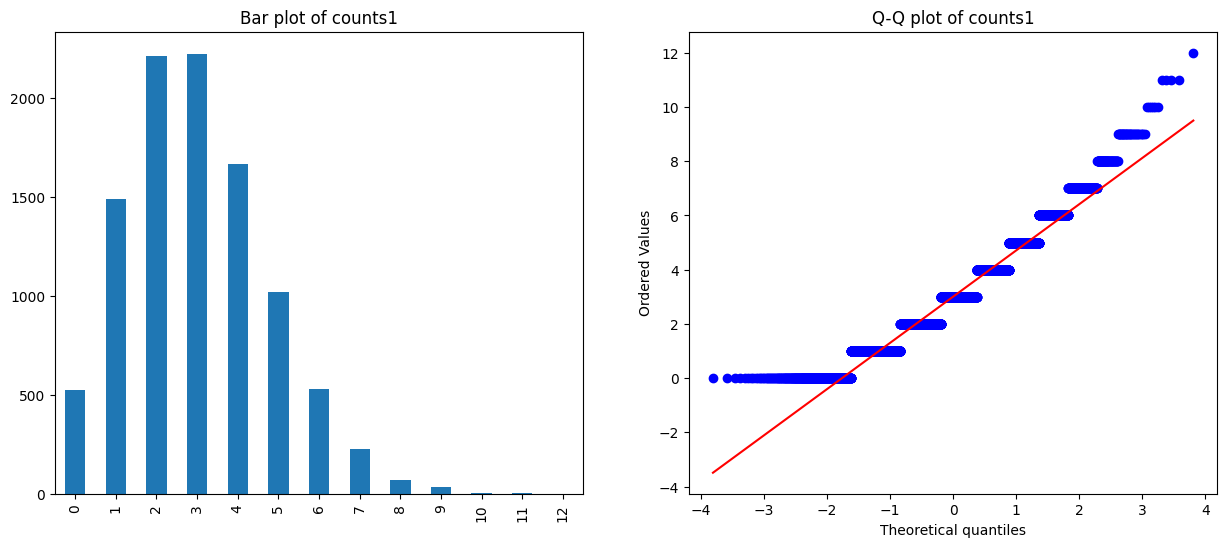

In [4]:
diagnostic_plots(df, "counts1")

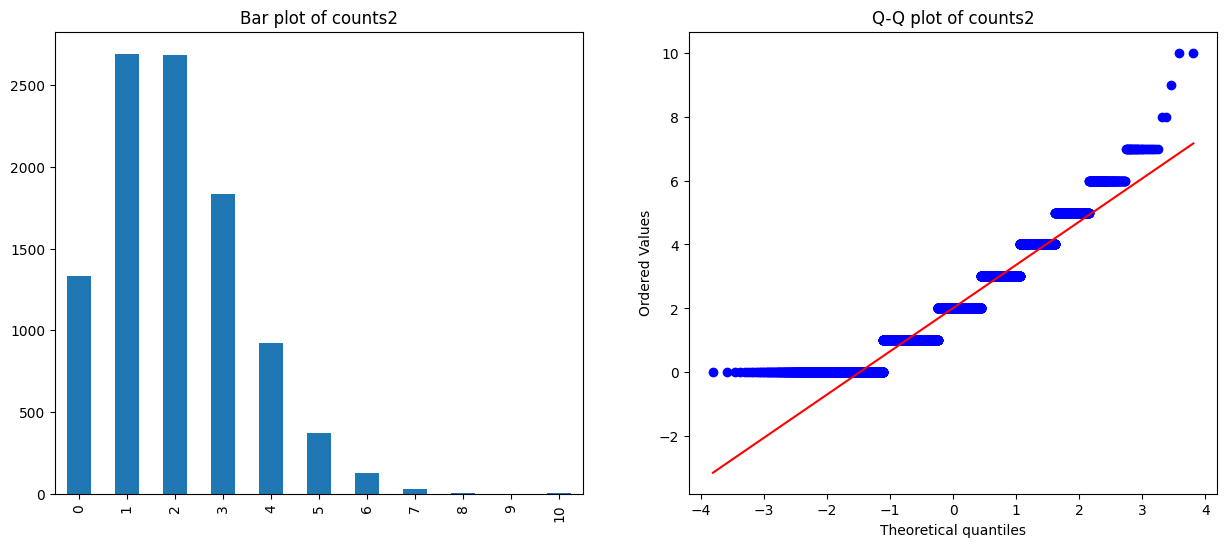

In [5]:
diagnostic_plots(df, "counts2")

# Square root with NumPy

In [6]:
df_tf = df.copy()

In [7]:
# apply square root transform

df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1", "counts2"]])
df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)

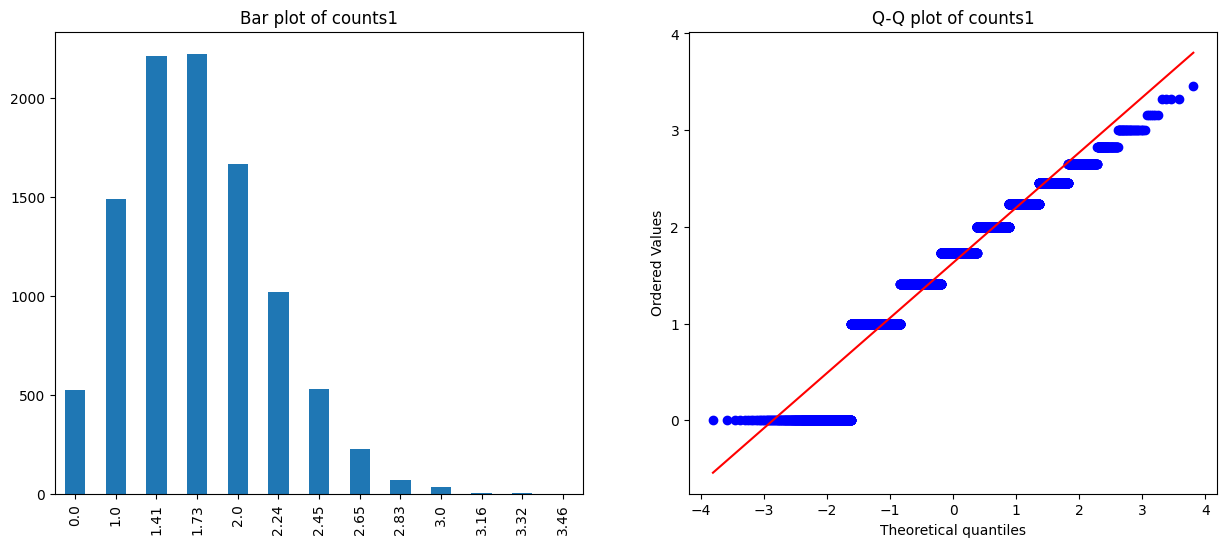

In [8]:
diagnostic_plots(df_tf, "counts1")

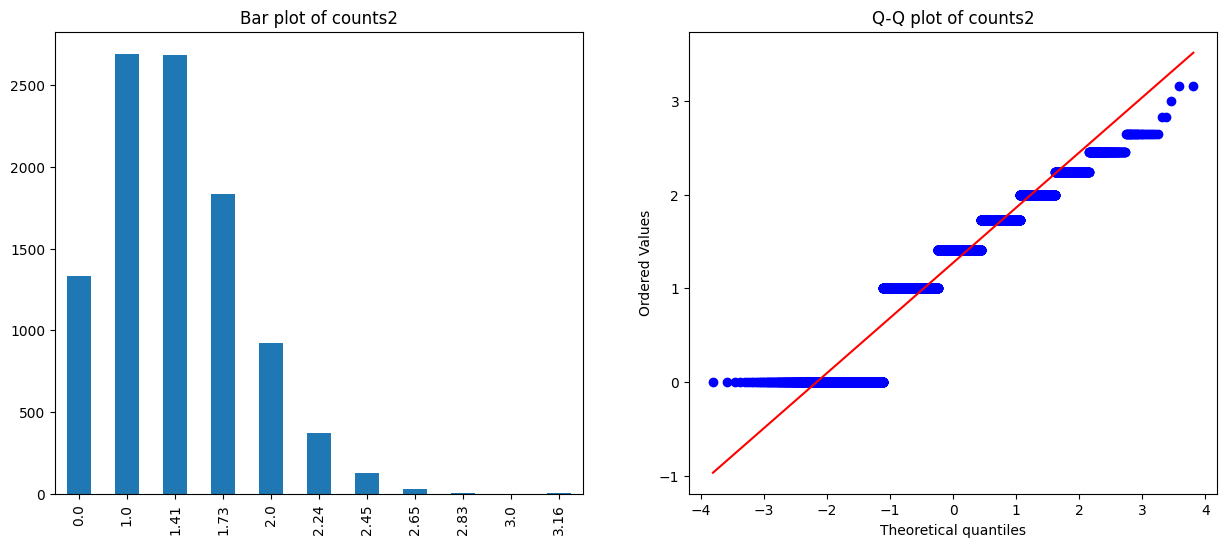

In [9]:
diagnostic_plots(df_tf, "counts2")

# Square root with Scikit-learn

In [12]:
from sklearn.preprocessing import FunctionTransformer

In [13]:
df_tf = df.copy()

In [14]:
transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

In [15]:
df_tf = transformer.transform(df[["counts1", "counts2"]])

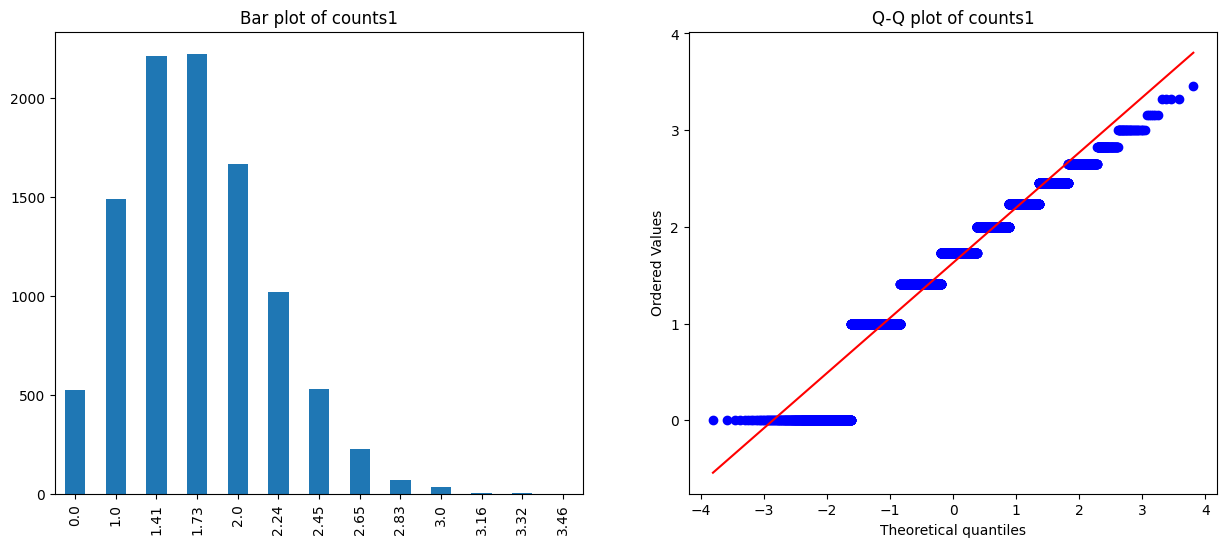

In [16]:
diagnostic_plots(df_tf, "counts1")

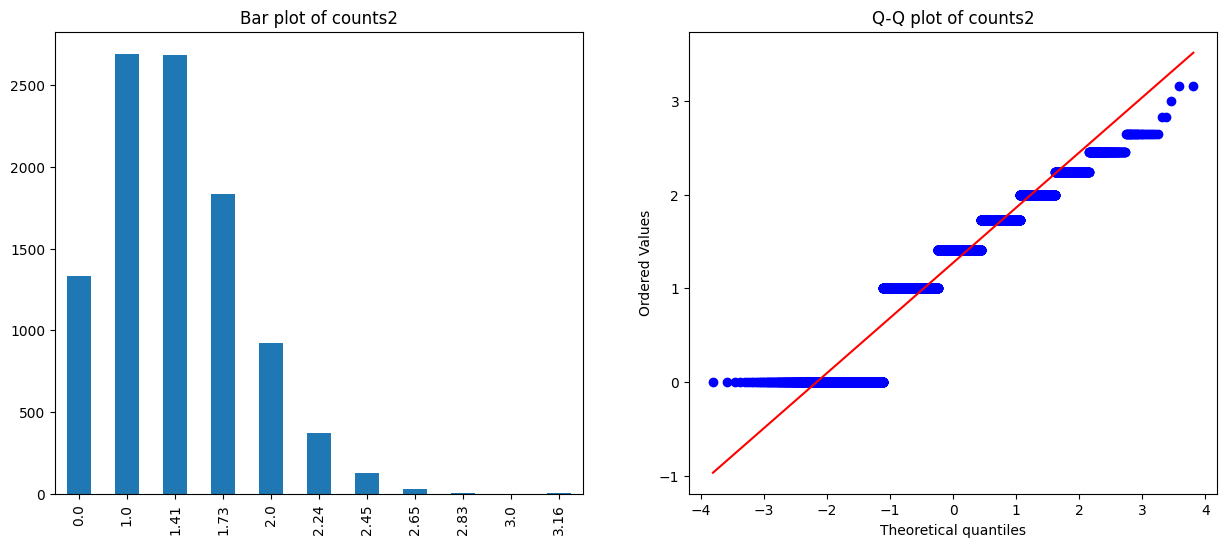

In [17]:
diagnostic_plots(df_tf, "counts2")

# Square root with Feature-engine

In [18]:
from feature_engine.transformation import PowerTransformer

In [19]:
root_t = PowerTransformer(exp = 1/2)
root_t.fit(df)
root_t.variables_

['counts1', 'counts2']

In [20]:
df_tf = root_t.transform(df)

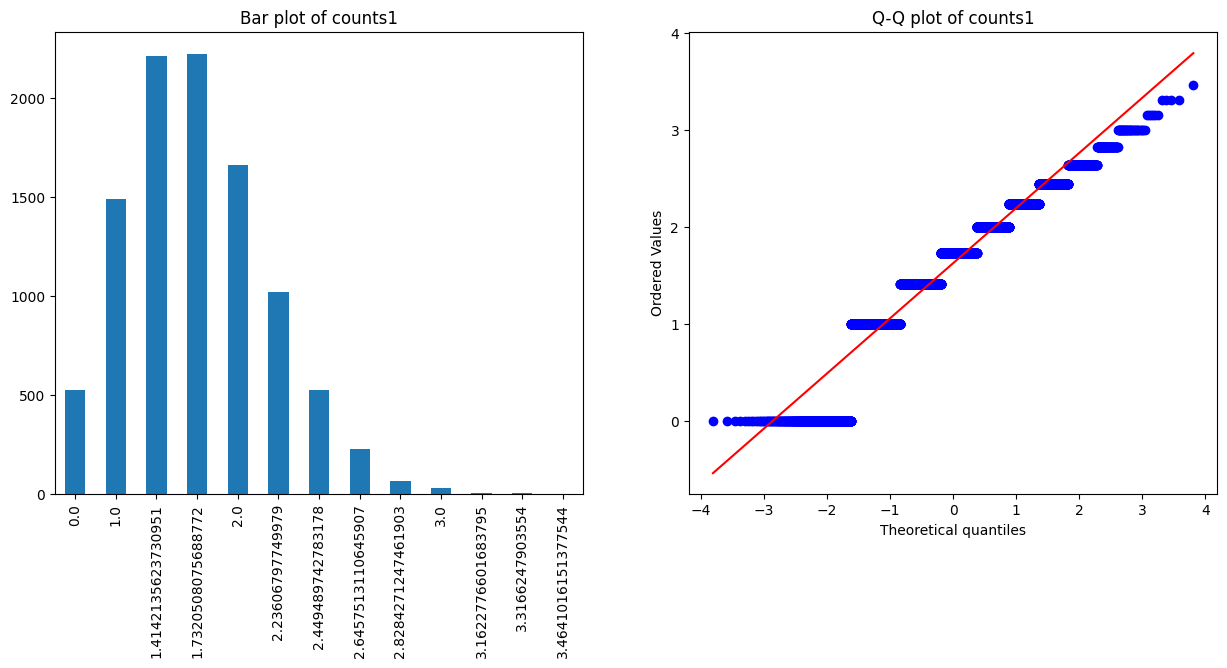

In [21]:
diagnostic_plots(df_tf, "counts1")

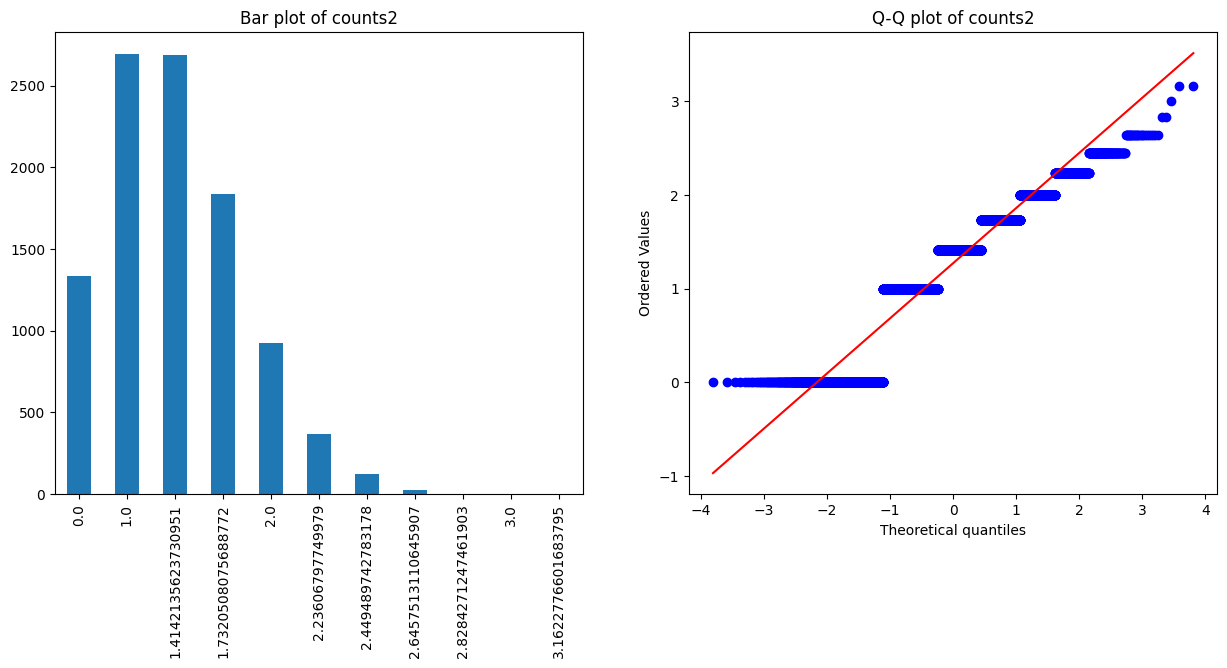

In [22]:
diagnostic_plots(df_tf, "counts2")